In [34]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('../data/raw/clinvar_conflicting.csv',
                 dtype={'CHROM': str})

/var/folders/tl/5pdn6vld70l0ndj9lvltyvxw0000gn/T/ipykernel_29598/4074411788.py:7: DtypeWarning: Columns (38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/clinvar_conflicting.csv',


In [35]:
# 2) Overview
print("\n--- SHAPE ---")
print(df.shape)

print("\n--- INFO ---")
df.info()



--- SHAPE ---
(65188, 46)

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC          

In [43]:
df.head(15)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.1168180G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,1,NaN,0,C,missense_variant,MODERATE,B3GALT6,Transcript,NM_080605.3,protein_coding,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,NaN,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,NaN,NC_000001.10:g.1470752G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,1,NaN,0,A,missense_variant,MODERATE,TMEM240,Transcript,NM_001114748.1,protein_coding,4/4,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,OK,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NaN,NC_000001.10:g.1737942A>G,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",35,NaN,1,G,missense_variant,MODERATE,GNB1,Transcript,NM_002074.4,protein_coding,6/12,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,OK,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160305G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,A,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,NaN,NC_000001.10:g.2160305G>T,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,T,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
5,1,2160554,G,C,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160554G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):P12755#VAR_071183,SO:0001583|missense_variant,33,NaN,0,C,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,381,349,117,G/R,Ggc/Cgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.700,4.079099,-2.0
6,1,3328358,T,C,0.0000,0.00000,0.0000,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.3328358T>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q9HAZ2#VAR_031433,SO:0001583|missense_variant,1,NaN,0,C,missense_variant,MODERATE,PRDM16,Transcript,XM_005244772.1,protein_coding,9/17,NaN,1858,1600,534,S/P,Tcg/Ccg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101,0.172,-0.543433,-1.0
7,1,3328659,C,T,0.1523,0.13103,0.1060,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.3328659C>T,NaN,single_nucleotide_variant,UniProtKB_(protein):Q9HAZ2#VAR_031434,SO:0001583|missense_variant,1,NaN,0,T,missense_variant,MODERATE,PRDM16,Transcript,XM_005244772.1,protein_coding,9/17,NaN,2159,1901,634,P/L,cCt/cTt,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101,23.000,3.424422,-3.0
8,1,3347452,G,A,0.0000,0.00357,0.0030,"MedGen:C3809288,OMIM:615373|MedGen:CN169374|Me...",NaN,Left_ventricular_noncompaction_8|not_specified...,NaN,NC_000001.10:g.3347452G

## 2. Distribucio de la variable objectiu (CLASS)

El grafic mostra un desbalanceig moderat: `CLASS=0` es majoritaria (~75%) i `CLASS=1` representa ~25%.
Aquest punt es important per a modelatge: caldra usar metriques robustes a classes desbalancejades (per exemple, F1 o ROC-AUC) i validar estratificant.


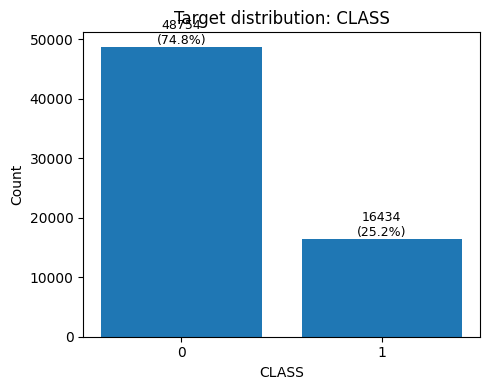

In [36]:
# 3) Target distribution
counts = df["CLASS"].value_counts().sort_index()
pct = df["CLASS"].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(5, 4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Target distribution: CLASS")
plt.xlabel("CLASS")
plt.ylabel("Count")
for i, v in enumerate(counts.values):
    plt.text(i, v, f"{v}\n({pct.iloc[i]:.1f}%)", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()


## 4. Missing values globals

El barplot de top missing permet veure rapidament quines columnes tenen mes absencia de dades.
Les variables amb >95% missing son candidates clares a eliminacio o tractament especific en preprocessing.
En columnes amb missing alt pero no extrem, la presencia/absencia pot ser informativa i es pot provar amb indicadors de missing.


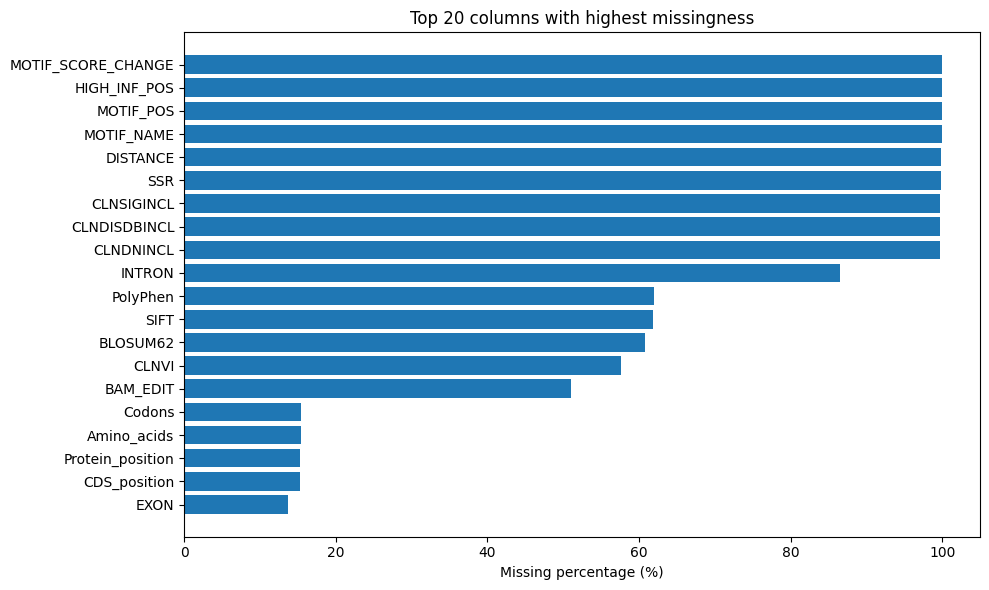


Columns with >95.0% missing: 9
['MOTIF_SCORE_CHANGE', 'HIGH_INF_POS', 'MOTIF_POS', 'MOTIF_NAME', 'DISTANCE', 'SSR', 'CLNSIGINCL', 'CLNDISDBINCL', 'CLNDNINCL']


In [37]:
# 4) Missing values (global)
import matplotlib.pyplot as plt

missing_tbl = (
    df.isna()
      .mean()
      .mul(100)
      .sort_values(ascending=False)
      .to_frame("missing_%")
)
missing_tbl["dtype"] = df.dtypes.astype(str)
missing_tbl["nunique"] = df.nunique(dropna=True)
missing_tbl["n_missing"] = df.isna().sum()

# Top missing columns
top_n = 20
top_missing = missing_tbl[missing_tbl["missing_%"] > 0].head(top_n).copy()

plt.figure(figsize=(10, 6))
plt.barh(top_missing.index[::-1], top_missing["missing_%"][::-1])
plt.xlabel("Missing percentage (%)")
plt.title(f"Top {top_n} columns with highest missingness")
plt.tight_layout()
plt.show()

# Columns above threshold
DROP_MISSING_THRESHOLD = 95.0
cols_drop_missing = missing_tbl.index[missing_tbl["missing_%"] > DROP_MISSING_THRESHOLD].tolist()
print(f"\nColumns with >{DROP_MISSING_THRESHOLD}% missing: {len(cols_drop_missing)}")
print(cols_drop_missing[:30])


## 5. Missing values per classe (CLASS)

El grafic compara el percentatge de missing entre `CLASS=0` i `CLASS=1` per les variables amb mes diferencia.
Diferencies altes indiquen que la missingness no es aleatoria i pot tenir valor predictiu.
Aixo justifica avaluar imputacio per classe o afegir variables binaries de missing en fases posteriors.


/var/folders/tl/5pdn6vld70l0ndj9lvltyvxw0000gn/T/ipykernel_29598/2496585074.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_cls = df.groupby(target).apply(lambda g: g.isna().mean() * 100).T


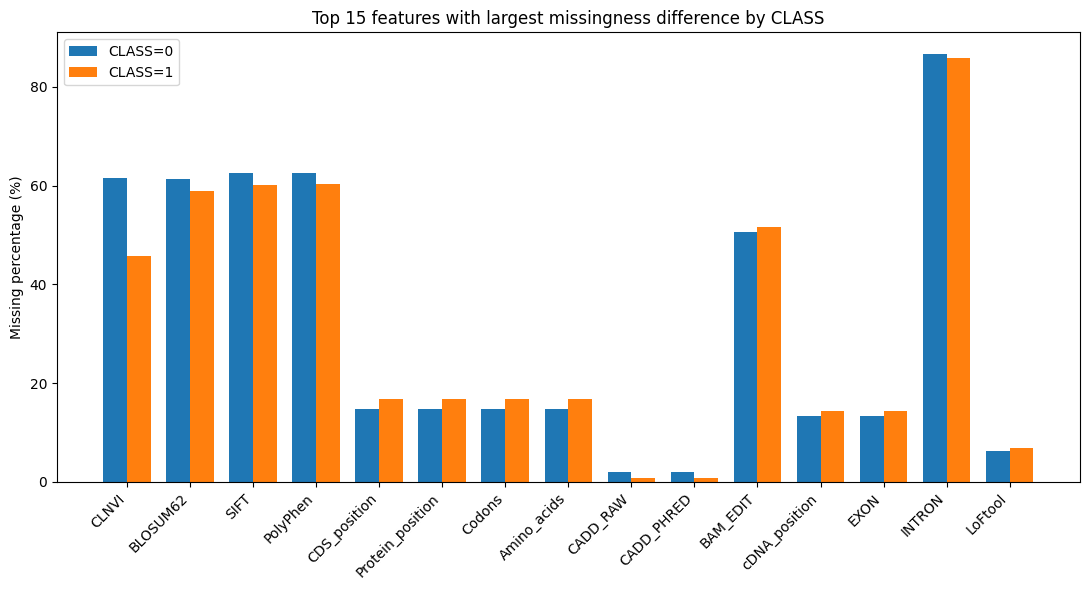

In [38]:
# 5) Missing values by CLASS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

target = "CLASS"

# Missing percentage by class and feature
missing_by_cls = df.groupby(target).apply(lambda g: g.isna().mean() * 100).T
missing_by_cls = missing_by_cls.drop(index=target, errors="ignore")

# Absolute difference between classes
missing_by_cls["diff_abs"] = (missing_by_cls[0] - missing_by_cls[1]).abs()

top_n = 15
top = missing_by_cls.sort_values("diff_abs", ascending=False).head(top_n)

x = np.arange(len(top.index))
width = 0.38

plt.figure(figsize=(11, 6))
plt.bar(x - width/2, top[0].values, width, label="CLASS=0")
plt.bar(x + width/2, top[1].values, width, label="CLASS=1")

plt.xticks(x, top.index, rotation=45, ha="right")
plt.ylabel("Missing percentage (%)")
plt.title(f"Top {top_n} features with largest missingness difference by CLASS")
plt.legend()
plt.tight_layout()
plt.show()


## 6. Variables genomiques basiques: CHROM, POS, REF i ALT

### CLASS per cromosoma (CHROM)
El countplot mostra com es reparteixen les classes per cromosoma i ajuda a detectar cromosomes amb mes carrega de conflicte.

### Taxa de conflicte per cromosoma
La proporcio de `CLASS=1` per `CHROM` serveix per comparar risc relatiu entre cromosomes.
Si algun cromosoma te pocs registres, cal interpretar la taxa amb cautela.

### Distribucio de POS
L'histograma de `POS` dona una visio global de concentracions de variants, pero la lectura s'ha de fer tenint en compte que cada cromosoma te escales diferents.

### Distribucions de REF i ALT
Els top valors permeten validar que dominen canvis simples (A/C/G/T) i detectar la presencia d'indels o substitucions complexes.


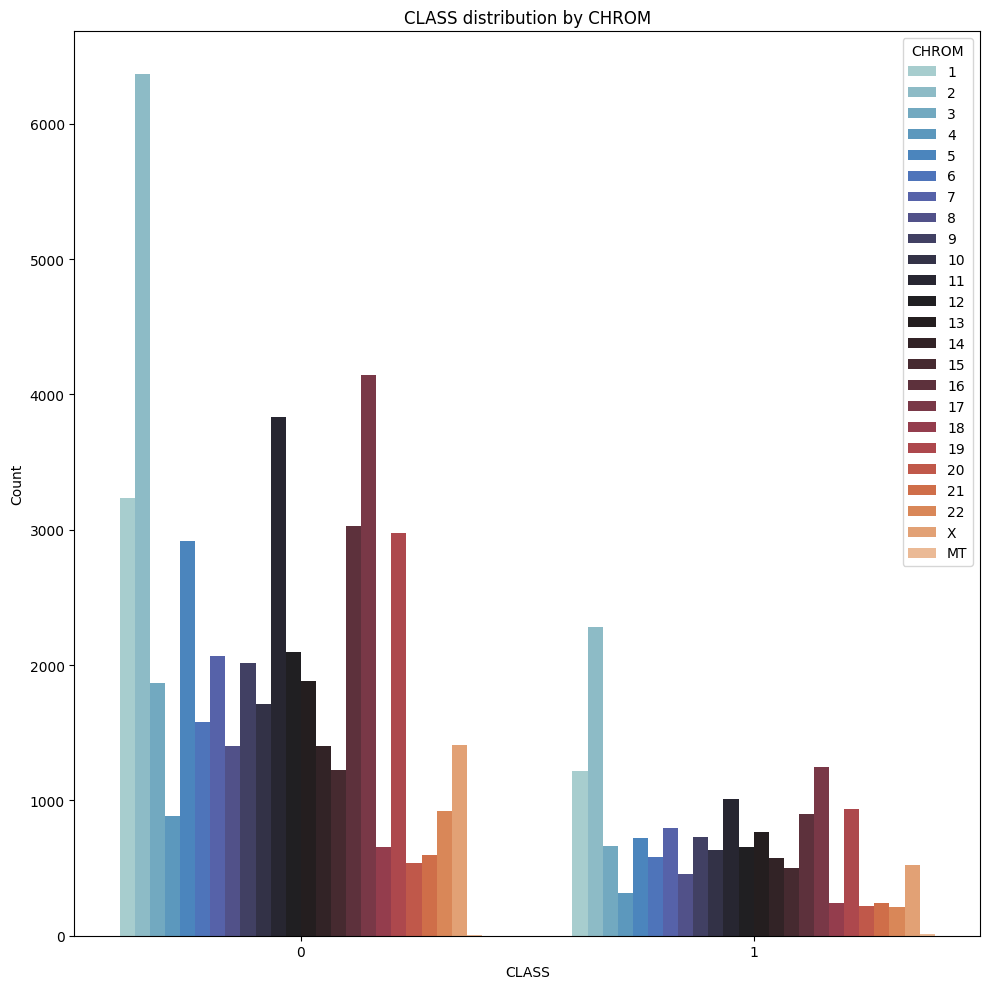

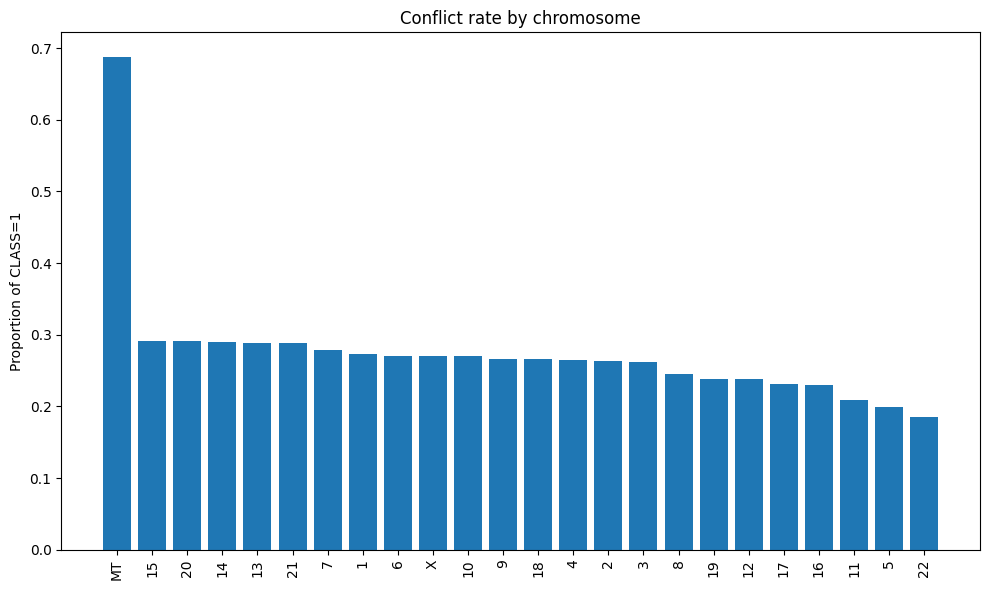

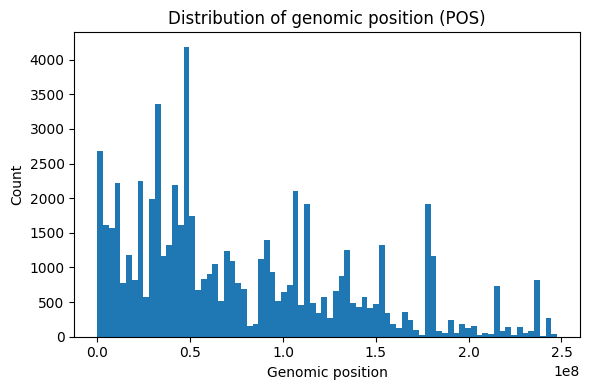

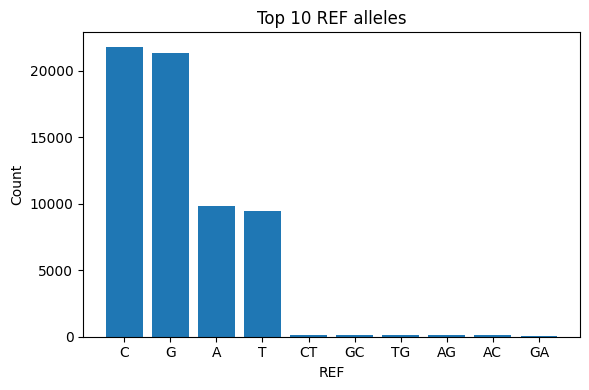

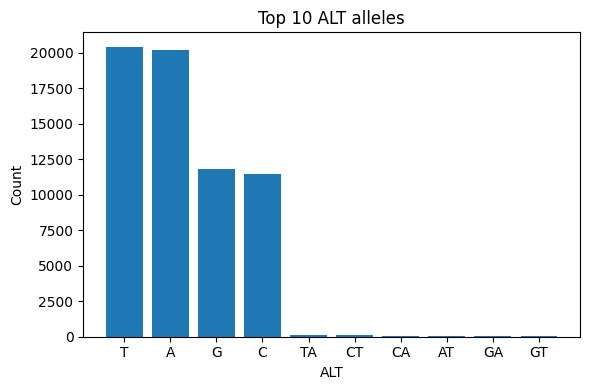

In [39]:
# 6) Genomic basic columns
import matplotlib.pyplot as plt
import seaborn as sns

basic_cols = ["CHROM", "POS", "REF", "ALT"]
for c in basic_cols:
    assert c in df.columns, f"Falta columna: {c}"

# CLASS count by chromosome
plt.figure(figsize=(10, 10))
sns.countplot(x="CLASS", data=df, hue="CHROM", palette="icefire")
plt.title("CLASS distribution by CHROM")
plt.xlabel("CLASS")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Conflict rate by chromosome
chrom_conflict_rate = (
    df.groupby("CHROM")["CLASS"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
plt.bar(chrom_conflict_rate.index, chrom_conflict_rate.values)
plt.ylabel("Proportion of CLASS=1")
plt.title("Conflict rate by chromosome")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# POS distribution
plt.figure(figsize=(6, 4))
plt.hist(df["POS"], bins=80)
plt.title("Distribution of genomic position (POS)")
plt.xlabel("Genomic position")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Top REF alleles
plt.figure(figsize=(6, 4))
ref_counts = df["REF"].value_counts().head(10)
plt.bar(ref_counts.index, ref_counts.values)
plt.title("Top 10 REF alleles")
plt.xlabel("REF")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Top ALT alleles
plt.figure(figsize=(6, 4))
alt_counts = df["ALT"].value_counts().head(10)
plt.bar(alt_counts.index, alt_counts.values)
plt.title("Top 10 ALT alleles")
plt.xlabel("ALT")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## 7. Frequencies alleliques (AF_ESP, AF_EXAC, AF_TGP)

### Histogrames
Les distribucions solen estar molt concentrades prop de 0, fet esperable en variants rares.
Aquesta asimetria pot requerir transformacions o discretitzacio en preprocessing.

### Boxplots per classe
Comparen la dispersio de cada frequencia entre `CLASS=0` i `CLASS=1` per detectar separacio potencial entre classes.

### Cardinalitat
Columnes amb cardinalitat molt alta poden comportar-se com quasi-identificadors i necessitar encoding especific (target/hashing/agrupacio).


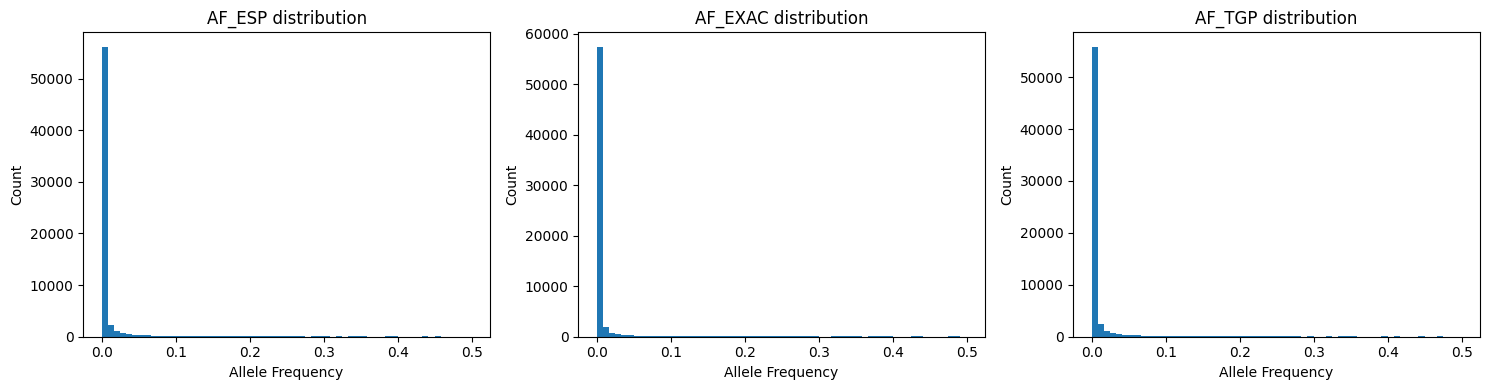

/var/folders/tl/5pdn6vld70l0ndj9lvltyvxw0000gn/T/ipykernel_29598/1373879965.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=["0", "1"], showfliers=False)
/var/folders/tl/5pdn6vld70l0ndj9lvltyvxw0000gn/T/ipykernel_29598/1373879965.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=["0", "1"], showfliers=False)
/var/folders/tl/5pdn6vld70l0ndj9lvltyvxw0000gn/T/ipykernel_29598/1373879965.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=["0", "1"], showfliers=False)


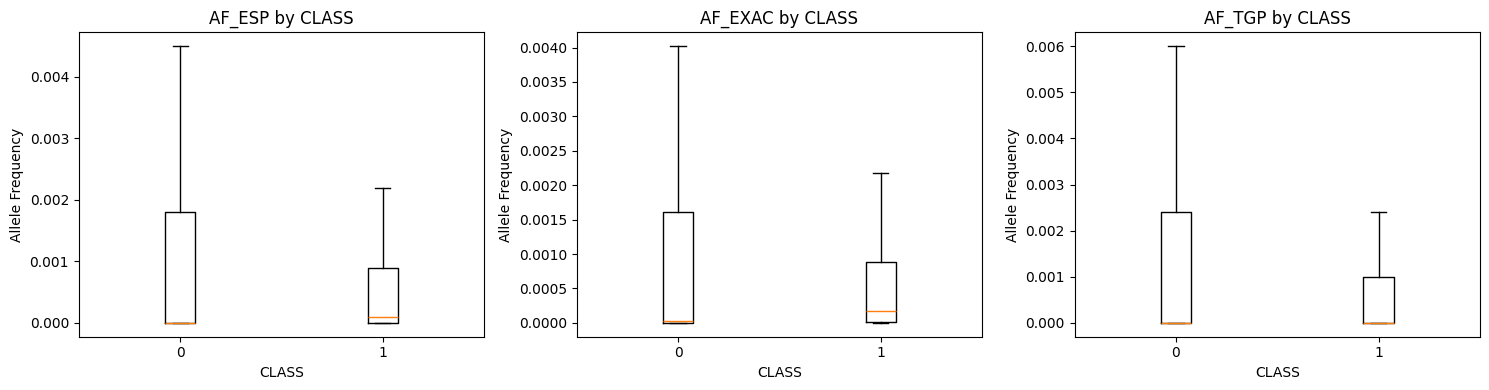

In [40]:
# 7) Allele frequencies
import matplotlib.pyplot as plt
import numpy as np

af_cols = [c for c in ["AF_ESP", "AF_EXAC", "AF_TGP"] if c in df.columns]

# Cast to numeric
for c in af_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(af_cols):
    axes[i].hist(df[col].dropna(), bins=60)
    axes[i].set_title(f"{col} distribution")
    axes[i].set_xlabel("Allele Frequency")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Boxplots by CLASS
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(af_cols):
    data0 = df.loc[df["CLASS"] == 0, col].dropna()
    data1 = df.loc[df["CLASS"] == 1, col].dropna()
    axes[i].boxplot([data0, data1], labels=["0", "1"], showfliers=False)
    axes[i].set_title(f"{col} by CLASS")
    axes[i].set_xlabel("CLASS")
    axes[i].set_ylabel("Allele Frequency")

plt.tight_layout()
plt.show()


## 11. Correlacio de variables numeriques amb CLASS

La matriu de correlacio ajuda a veure relacions lineals entre variables numeriques.
Correlacions baixes amb `CLASS` indiquen que no hi ha un predictor numeric unic dominant i que el patro probablement es multivariable i/o no lineal.
Aquest resultat orienta cap a models que capturin interaccions entre variables.


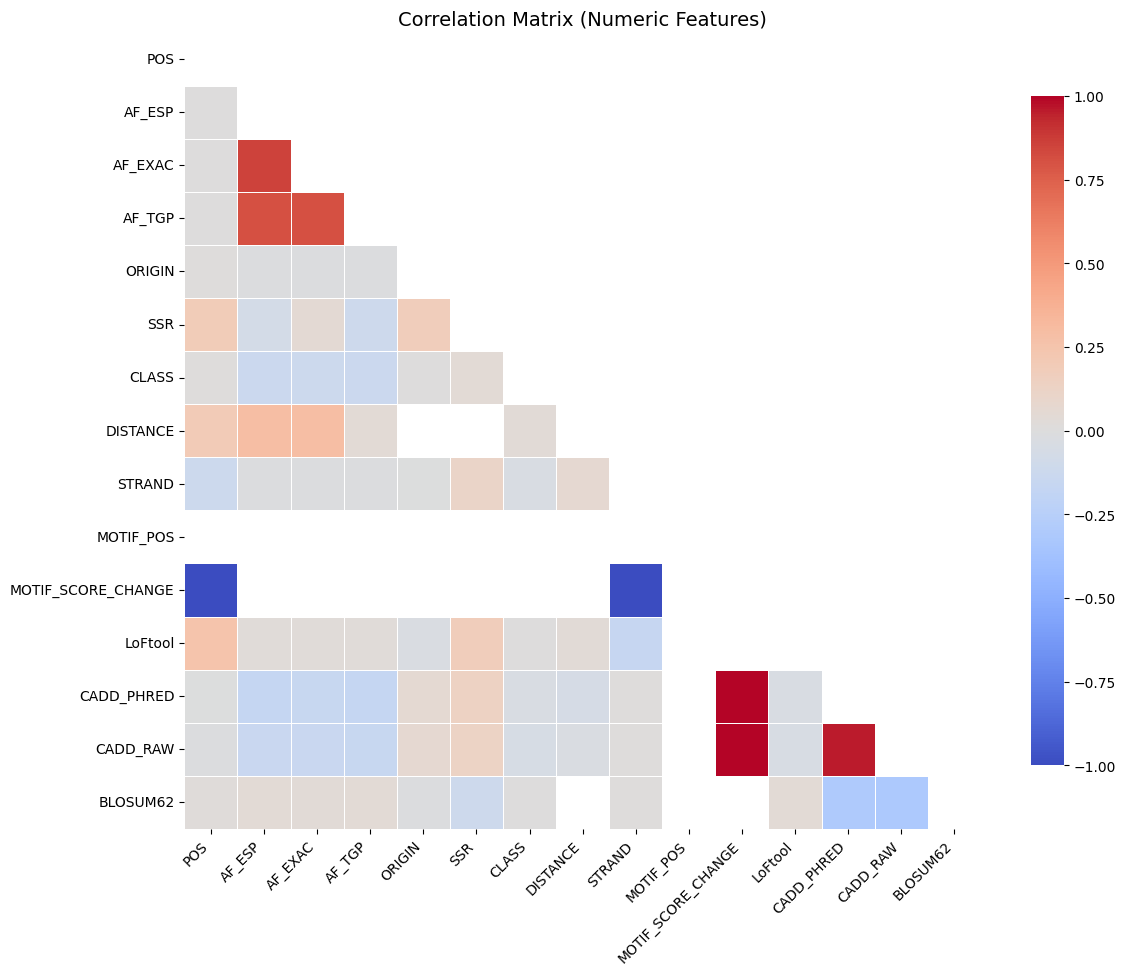

In [41]:
# 11) Correlation matrix (numeric)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Numeric columns only
num_df = df.select_dtypes(include=[np.number]).copy()
corr = num_df.corr()

# Hide upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix (Numeric Features)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [42]:
class_corr.head(15)

CLASS                 1.000000
SSR                   0.042410
DISTANCE              0.036865
POS                   0.012061
ORIGIN                0.004357
BLOSUM62              0.001593
LoFtool               0.000045
STRAND               -0.031369
CADD_PHRED           -0.037713
CADD_RAW             -0.053485
AF_EXAC              -0.121213
AF_ESP               -0.126538
AF_TGP               -0.130077
MOTIF_POS                  NaN
MOTIF_SCORE_CHANGE         NaN
Name: CLASS, dtype: float64

## 12. Particio de dades (train/validation/test)

Es defineix una particio fixa per garantir comparacions justes entre models:
- 90% per `train_val` i 10% per `test`
- del `train_val`, 10% per `validation`
- mateixa `random_state` en tots els splits

Aquesta particio es mantindra identica per a tots els models del projecte.



In [ ]:
# Data split (fixed for all models)
from sklearn.model_selection import train_test_split

TARGET_COL = "CLASS"
RANDOM_STATE = 42
TEST_SIZE = 0.10
VAL_SIZE_WITHIN_TRAIN = 0.10

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# 90% train_val / 10% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y,
)

# From train_val, keep 10% for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=VAL_SIZE_WITHIN_TRAIN,
    random_state=RANDOM_STATE,
    stratify=y_train_val,
)

Data split fixed with random_state=42
This exact split will be reused for all models.
Train: 52802 rows (81.00%)
Validation: 5867 rows (9.00%)
Test: 6519 rows (10.00%)
